
# 第八章 文本挖掘


![image.png](images/author.png)

## What can be learned from 5 million books

https://www.bilibili.com/video/BV1jJ411u7Nd

This talk by Jean-Baptiste Michel and Erez Lieberman Aiden is phenomenal. 


Michel, J.-B., et al. (2011). **Quantitative Analysis of Culture Using Millions of Digitized Books**. Science, 331, 176–182.

In [1]:
%%html 
<iframe src="//player.bilibili.com/player.html?aid=68934891&bvid=BV1jJ411u7Nd&cid=119471774&page=1" 
width=1000 height=600
scrolling="no" border="0" frameborder="no" framespacing="0" allowfullscreen="true"> </iframe>

![](./img/books.jpg)

试一下谷歌图书的数据: https://books.google.com/ngrams/
    

数据下载： http://www.culturomics.org/home

##  Bag-of-words model （BOW）

Represent text as numerical feature vectors

- We create a vocabulary of unique tokens—for example, words—from the entire set of documents.
- We construct a feature vector from each document that contains the counts of how often each word occurs in the particular document.

Since the unique words in each document represent only a small subset of all the
words in the bag-of-words vocabulary, the feature vectors will consist of mostly
zeros, which is why we call them sparse

![image.png](images/bow.png)

“词袋模型”（Bag of words model）假定对于一个文本：
- 忽略词序、语法、句法；
- 将其仅仅看做是一个词集合或组合；
- 每个词的出现都是独立的，不依赖于其他词是否出现。
    - 文本任意一个位置出现某一个词汇是独立选择的，不受前面句子的影响。

这种假设虽然对自然语言进行了简化，便于模型化。

Document-Term Matrix (DTM)


问题：例如在新闻个性化推荐中，用户对“南京醉酒驾车事故”这个短语很感兴趣。词袋模型忽略了顺序和句法，认为用户对“南京”、“醉酒”、“驾车”和“事故”感兴趣，因此可能推荐出和“南京”、“公交车”、“事故”相关的新闻。

解决方法: 可抽取出整个短语；或者采用高阶（2阶以上）统计语言模型。例如bigram、trigram来将词序保留下来，相当于bag of bigram和bag of trigram。

### Transforming words into feature vectors

A document-term matrix or term-document matrix is a mathematical matrix that describes the frequency of terms that occur in a collection of documents. 

In a document-term matrix, rows correspond to documents in the collection and columns correspond to terms. 

There are various schemes for determining the value that each entry in the matrix should take. One such scheme is tf-idf. They are useful in the field of natural language processing.

D1 = "I like databases"

D2 = "I hate databases"

|          |  I        |    like   |hate        | databases   |
| -------------|:-------------:|:-------------:|:-------------:|-----:|
| D1| 1| 1 | 0 |1|
| D2| 1| 0 | 1 |1|

In [98]:
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
count = CountVectorizer(ngram_range=(1, 2))
docs = np.array([
        'The sun is shining',
        'The weather is sweet',
        'The sun is shining and the weather is sweet'])
bag = count.fit_transform(docs)

In [100]:
count.get_feature_names()

['and',
 'and the',
 'is',
 'is shining',
 'is sweet',
 'shining',
 'shining and',
 'sun',
 'sun is',
 'sweet',
 'the',
 'the sun',
 'the weather',
 'weather',
 'weather is']

In [101]:
print(count.vocabulary_) # word: position index

{'the': 10, 'sun': 7, 'is': 2, 'shining': 5, 'the sun': 11, 'sun is': 8, 'is shining': 3, 'weather': 13, 'sweet': 9, 'the weather': 12, 'weather is': 14, 'is sweet': 4, 'and': 0, 'shining and': 6, 'and the': 1}


In [102]:
type(bag)

scipy.sparse.csr.csr_matrix

In [103]:
print(bag.toarray())

[[0 0 1 1 0 1 0 1 1 0 1 1 0 0 0]
 [0 0 1 0 1 0 0 0 0 1 1 0 1 1 1]
 [1 1 2 1 1 1 1 1 1 1 2 1 1 1 1]]


In [113]:
# Relative Frequency
bt = bag.toarray()
bs = np.sum(bt, axis = 1).reshape(-1,1)
# numpy divide row by row sum
bt/bs

array([[0.  , 0.  , 0.14, 0.14, 0.  , 0.14, 0.  , 0.14, 0.14, 0.  , 0.14,
        0.14, 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.14, 0.  , 0.14, 0.  , 0.  , 0.  , 0.  , 0.14, 0.14,
        0.  , 0.14, 0.14, 0.14],
       [0.06, 0.06, 0.12, 0.06, 0.06, 0.06, 0.06, 0.06, 0.06, 0.06, 0.12,
        0.06, 0.06, 0.06, 0.06]])

In [6]:
import pandas as pd
pd.DataFrame(bag.toarray(), columns = count.get_feature_names())

and  and the  is  is shining  is sweet  shining  shining and  sun  sun is  \
0    0        0   1           1         0        1            0    1       1   
1    0        0   1           0         1        0            0    0       0   
2    1        1   2           1         1        1            1    1       1   

   sweet  the  the sun  the weather  weather  weather is  
0      0    1        1            0        0           0  
1      1    1        0            1        1           1  
2      1    2        1            1        1           1

The sequence of items in the bag-of-words model that we just created is also called the 1-gram or unigram model: each item or token in the vocabulary represents a single word. 

## n-gram model
The choice of the number n in the n-gram model depends on the particular application

- 1-gram: "the", "sun", "is", "shining"
- 2-gram: "the sun", "sun is", "is shining" 

The CountVectorizer class in scikit-learn allows us to use different
n-gram models via its `ngram_range` parameter. 

While a 1-gram
representation is used by default

we could switch to a 2-gram
representation by initializing a new CountVectorizer instance with
ngram_range=(2,2).

## TF-IDF
Assessing word relevancy via term frequency-inverse document frequency

$$tf*idf(t, d) = tf(t, d) \times idf(t)$$

- $tf(t, d)$ is the term frequency of term t in document d.
- inverse document frequency $idf(t)$ can be calculated as: $idf(t) = log \frac{n_d}{1 + df(d, t)}$



Question: Why do we add the constant 1 to the denominator ?



The tf-idf equation that was implemented in scikit-learn is as follows: $tf*idf(t, d) = tf(t, d) \times （idf(t, d) + 1）$
 
[SKlearn use `smooth_idf=True`](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfTransformer.html#sklearn.feature_extraction.text.TfidfTransformer) $idf(t) = log \frac{1+n_d}{1 + df(d, t)} + 1$

where $n_d$ is the total number of documents, and $df(d, t)$ is the number of documents $d$ that contain the term $t$. 


 
### L2-normalization

$$l2_{x} = \frac{x} {\sqrt{\sum {x^2}}}$$



课堂作业：请根据公式计算'is'这个词在文本2中的tfidf数值？

![](./img/ask.jpeg)

### TfidfTransformer
Scikit-learn implements yet another transformer, the TfidfTransformer, that
takes the raw term frequencies from CountVectorizer as input and transforms
them into tf-idfs:

In [7]:
from sklearn.feature_extraction.text import TfidfTransformer
np.set_printoptions(precision=2)

tfidf = TfidfTransformer(use_idf=True, norm='l2', smooth_idf=True)
print(tfidf.fit_transform(count.fit_transform(docs)).toarray())


[[0.   0.   0.31 0.4  0.   0.4  0.   0.4  0.4  0.   0.31 0.4  0.   0.
  0.  ]
 [0.   0.   0.31 0.   0.4  0.   0.   0.   0.   0.4  0.31 0.   0.4  0.4
  0.4 ]
 [0.29 0.29 0.35 0.22 0.22 0.22 0.29 0.22 0.22 0.22 0.35 0.22 0.22 0.22
  0.22]]


In [11]:
from sklearn.feature_extraction.text import TfidfTransformer
np.set_printoptions(precision=2)

tfidf = TfidfTransformer(use_idf=True, norm=None, smooth_idf=True)
print(tfidf.fit_transform(count.fit_transform(docs)).toarray())


[[0.   0.   1.   1.29 0.   1.29 0.   1.29 1.29 0.   1.   1.29 0.   0.
  0.  ]
 [0.   0.   1.   0.   1.29 0.   0.   0.   0.   1.29 1.   0.   1.29 1.29
  1.29]
 [1.69 1.69 2.   1.29 1.29 1.29 1.69 1.29 1.29 1.29 2.   1.29 1.29 1.29
  1.29]]


In [12]:
import pandas as pd
bag = tfidf.fit_transform(count.fit_transform(docs))
pd.DataFrame(bag.toarray(), columns = count.get_feature_names())

and   and the   is  is shining  is sweet   shining  shining and  \
0  0.000000  0.000000  1.0    1.287682  0.000000  1.287682     0.000000   
1  0.000000  0.000000  1.0    0.000000  1.287682  0.000000     0.000000   
2  1.693147  1.693147  2.0    1.287682  1.287682  1.287682     1.693147   

        sun    sun is     sweet  the   the sun  the weather   weather  \
0  1.287682  1.287682  0.000000  1.0  1.287682     0.000000  0.000000   
1  0.000000  0.000000  1.287682  1.0  0.000000     1.287682  1.287682   
2  1.287682  1.287682  1.287682  2.0  1.287682     1.287682  1.287682   

   weather is  
0    0.000000  
1    1.287682  
2    1.287682

In [13]:
# 一个词的tfidf值
import numpy as np
tf_is = 2.0
n_docs = 3.0
n_docs_with_is = 3.0
# smooth_idf=True & norm = None
idf_is = np.log((1+n_docs) / (1+n_docs_with_is)) + 1

tfidf_is = tf_is * idf_is
print('tf-idf of term "is" = %.2f' % tfidf_is)

tf-idf of term "is" = 2.00


In [14]:
# *最后一个文本*里的词的tfidf原始数值（未标准化）
tfidf = TfidfTransformer(use_idf=True, norm=None, smooth_idf=True)
raw_tfidf = tfidf.fit_transform(count.fit_transform(docs)).toarray()[-1]
raw_tfidf, count.get_feature_names()

(array([1.69, 1.69, 2.  , 1.29, 1.29, 1.29, 1.69, 1.29, 1.29, 1.29, 2.  ,
        1.29, 1.29, 1.29, 1.29]),
 ['and',
  'and the',
  'is',
  'is shining',
  'is sweet',
  'shining',
  'shining and',
  'sun',
  'sun is',
  'sweet',
  'the',
  'the sun',
  'the weather',
  'weather',
  'weather is'])

In [15]:
# l2标准化后的tfidf数值
l2_tfidf = raw_tfidf / np.sqrt(np.sum(raw_tfidf**2))
l2_tfidf 

array([0.29, 0.29, 0.35, 0.22, 0.22, 0.22, 0.29, 0.22, 0.22, 0.22, 0.35,
       0.22, 0.22, 0.22, 0.22])

## 政府工作报告文本挖掘

### 0. 读取数据

In [16]:
with open('./data/gov_reports1954-2021.txt', 'r', encoding = 'utf-8') as f:
    reports = f.readlines()
    

In [17]:
len(reports)

52

In [18]:
print(reports[-7][:1000])

1964	1964年国务院政府工作报告（摘要）——１９６４年１２月２１日和２２日在第三届全国人民代表大会第一次会议上　　　　　　　　　　　  　　　　　　　　　　　　　　　国务院总理周恩来　　五年来，我国各族人民在中国共产党的英明领导下，高举毛泽东思想的光辉旗帜，坚持鼓足干劲、力争上游、多快好省地建设社会主义的总路线，在全国范围内开展了阶级斗争、生产斗争、科学实验三大革命运动，有力地反击了资本主义和封建势力的进攻，提高了人民群众的社会主义觉悟，基本上完成了调整国民经济的任务，使工农业生产全面高涨，整个国民经济全面好转，我国自力更生的力量大为增强。同时，在国际上，我们同美帝国主义、各国反动派和现代修正主义进行了针锋相对的斗争，打退了他们掀起的一次又一次的反华高潮；积极地支援了各国革命人民，发展了同许多国家的友好合作关系；我国的国际威望更加提高了，我们的朋友遍天下。　　我们要进一步开展社会主义教育运动，坚决依靠工人阶级、贫农下中农、革命的干部、革命的知识分子和其他革命分子，根据社会主义的彻底革命的原则，在政治、经济、思想和组织这四个方面，进行清理和基本建设，在人民群众中深刻地进行一次阶级教育和社会主义教育；要进一步开展思想文化战线上的社会主义革命，逐步实现知识分子劳动化，劳动人民知识化；要进一步巩固和发展人民民主统一战线，加强各民族的大团结；各级机关和各级干部必须革命化，都要学习解放军、大庆、大寨的彻底革命的精神和工作作风。在深入广泛开展社会主义教育运动的基础上，一九六五年要大力组织工农业生产的新高潮，为一九六六年开始的第三个五年计划作好准备，争取在不太长的历史时期内，把我国建成一个具有现代农业、现代工业、现代国防和现代科学技术的社会主义强国。在国际方面，我们要继续贯彻我国对外政策的总路线，同全世界人民一起，坚决反对美帝国主义及其走狗，为争取世界和平、民族解放、人民民主和社会主义事业的新胜利而奋斗。　　国民经济的成就和今后的建设任务　　周恩来总理在报告中首先指出，从第二届全国人民代表大会第一次会议以来，我国各族人民，在中国共产党的英明领导下，高举毛泽东思想的光辉旗帜，坚持鼓足干劲、力争上游、多快好省地建设社会主义的总路线，在全国范围内展开了阶级斗争、生产斗争、科学实验三大革命运动，在国际上同帝国主义、各国反动派和现代修正主义进行了针锋相对的斗争，取得了一个又一个的伟大胜

In [19]:
print(reports[4][:500])

2017	　　各位代表：　　现在，我代表国务院，向大会报告政府工作，请予审议，并请全国政协各位委员提出意见。　　一、2016年工作回顾　　过去一年，我国发展面临国内外诸多矛盾叠加、风险隐患交汇的严峻挑战。在以习近平同志为核心的党中央坚强领导下，全国各族人民迎难而上，砥砺前行，推动经济社会持续健康发展。党的十八届六中全会正式明确习近平总书记的核心地位，体现了党和人民的根本利益，对保证党和国家兴旺发达、长治久安，具有十分重大而深远的意义。各地区、各部门不断增强政治意识、大局意识、核心意识、看齐意识，推动全面建成小康社会取得新的重要进展，全面深化改革迈出重大步伐，全面依法治国深入实施，全面从严治党纵深推进，全年经济社会发展主要目标任务圆满完成，“十三五”实现了良好开局。　　——经济运行缓中趋稳、稳中向好。国内生产总值达到74.4万亿元，增长6.7%，名列世界前茅，对全球经济增长的贡献率超过30%。居民消费价格上涨2%。工业企业利润由上年下降2.3%转为增长8.5%，单位国内生产总值能耗下降5%，经济发展的质量和效益明显提高。　　——就业增长超出预期。全年城镇新增就业1314万人。高校毕业生就


 pip install jieba
> https://github.com/fxsjy/jieba

 pip install wordcloud
>  https://github.com/amueller/word_cloud

 pip install gensim


In [23]:
pip install gensim

Note: you may need to restart the kernel to use updated packages.


In [21]:
pip install jieba

     |████████████████████████████████| 19.2 MB 195 kB/s eta 0:00:01
  Created wheel for jieba: filename=jieba-0.42.1-py3-none-any.whl size=19314476 sha256=426bf637e0c73f6bd0bd76745aa8560c72e9765c1cf6303acdc41e6af563e71c
  Stored in directory: /Users/datalab/Library/Caches/pip/wheels/7d/74/cf/08c94db4b784e2c1ef675a600b7b5b281fd25240dcb954ee7e
Successfully built jieba
Note: you may need to restart the kernel to use updated packages.


In [22]:
pip install wordcloud

     |████████████████████████████████| 220 kB 943 kB/s eta 0:00:01
  Created wheel for wordcloud: filename=wordcloud-1.8.1-cp39-cp39-macosx_10_9_x86_64.whl size=155359 sha256=4ac5faa65d06b80462538462f625b1a819aac5313914c15469dd9580e0899013
  Stored in directory: /Users/datalab/Library/Caches/pip/wheels/f9/7a/dd/06ef8b5dfe5483f6204133c08eeb16c287cc2c05e290ae2fc0
Successfully built wordcloud
Note: you may need to restart the kernel to use updated packages.


In [24]:
%matplotlib inline
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import sys 
import numpy as np
from collections import defaultdict
import statsmodels.api as sm
from wordcloud import WordCloud
import jieba
import matplotlib
import gensim
from gensim import corpora, models, similarities
from gensim.utils import simple_preprocess
from gensim.parsing.preprocessing import STOPWORDS
#matplotlib.rcParams['font.sans-serif'] = ['Microsoft YaHei'] #指定默认字体 
matplotlib.rc("savefig", dpi=400)

In [75]:
# 为了确保中文可以在matplotlib里正确显示
#matplotlib.rcParams['font.sans-serif'] = ['Microsoft YaHei'] #指定默认字体 
# 需要确定系统安装了Microsoft YaHei

In [76]:
# import matplotlib
# my_font = matplotlib.font_manager.FontProperties(
#     fname='/Users/chengjun/github/cjc/data/msyh.ttf')

### 1. 分词

In [25]:
import jieba

seg_list = jieba.cut("我来到北京清华大学", cut_all=True)
print("Full Mode: " + "/ ".join(seg_list))  # 全模式

seg_list = jieba.cut("我来到北京清华大学", cut_all=False)
print("Default Mode: " + "/ ".join(seg_list))  # 精确模式

seg_list = jieba.cut("他来到了网易杭研大厦")  # 默认是精确模式
print(", ".join(seg_list))

seg_list = jieba.cut_for_search("小明硕士毕业于中国科学院计算所，后在日本京都大学深造")  # 搜索引擎模式
print(", ".join(seg_list))

Building prefix dict from the default dictionary ...
Dumping model to file cache /var/folders/8b/hhnbt0nd4zsg2qhxc28q23w80000gn/T/jieba.cache
Loading model cost 0.863 seconds.
Prefix dict has been built successfully.


Full Mode: 我/ 来到/ 北京/ 清华/ 清华大学/ 华大/ 大学
Default Mode: 我/ 来到/ 北京/ 清华大学
他, 来到, 了, 网易, 杭研, 大厦
小明, 硕士, 毕业, 于, 中国, 科学, 学院, 科学院, 中国科学院, 计算, 计算所, ，, 后, 在, 日本, 京都, 大学, 日本京都大学, 深造


## 2. 停用词

In [26]:
filename = './data/stopwords.txt'
stopwords = {}
f = open(filename, 'r')
line = f.readline().rstrip()
while line:
    stopwords.setdefault(line, 0)
    stopwords[line] = 1
    line = f.readline().rstrip()
f.close()

In [36]:
adding_stopwords = [u'我们', u'要', u'地', u'有', u'这', u'人',
                    u'发展',u'建设',u'加强',u'继续',u'对',u'等',
                    u'推进',u'工作',u'增加']
for s in adding_stopwords: stopwords[s]=10  

### 3. 关键词抽取

#### 基于TF-IDF 算法的关键词抽取

In [27]:
import jieba.analyse
txt = reports[-1]
tf = jieba.analyse.extract_tags(txt, topK=200, withWeight=True)

In [28]:
u"、".join([i[0] for i in tf[:50]])

'人民、我们、国家、我国、一九五三年、工业、一九五四年、必须、工作、建设、发展、和平、一九四九年、社会主义、一九五、国家机关、生产、计划、全国、农业、亚洲、美国、事业、企业、应当、经济、这些、改造、增加、并且、完成、但是、已经、等于、合作社、集团、方面、需要、台湾、资本主义、反对、几年、生活、建立、为了、技术、这个、进行、日内瓦、问题'

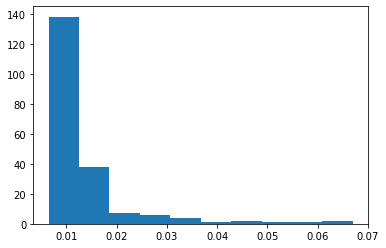

In [29]:
plt.hist([i[1] for i in tf])
plt.show()

#### 基于 TextRank 算法的关键词抽取

In [30]:
tr = jieba.analyse.textrank(txt,topK=200, withWeight=True)
u"、".join([i[0] for i in tr[:50]])

'国家、人民、工业、发展、建设、工作、生产、美国、企业、经济、计划、社会主义、中国、进行、全国、技术、亚洲、集团、需要、问题、农业、方面、完成、建立、台湾、生活、事业、没有、改造、应当、资本主义、增加、关系、组织、保证、会议、侵略、不能、注意、加强、战争、提高、社会、文化、继续、政府、现代化、能够、日内瓦、世界'

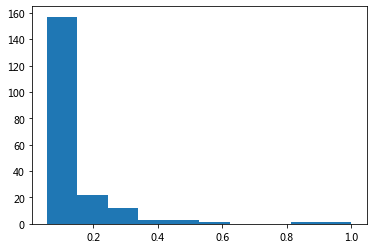

In [45]:
plt.hist([i[1] for i in tr])
plt.show()

In [31]:
import pandas as pd

def keywords(index):
    txt = reports[-index]
    tf = jieba.analyse.extract_tags(txt, topK=200, withWeight=True)
    tr = jieba.analyse.textrank(txt,topK=200, withWeight=True)
    tfdata = pd.DataFrame(tf, columns=['word', 'tfidf'])
    trdata = pd.DataFrame(tr, columns=['word', 'textrank'])
    worddata = pd.merge(tfdata, trdata, on='word')
    fig = plt.figure(figsize=(16, 6),facecolor='white')
    plt.plot(worddata.tfidf, worddata.textrank, linestyle='',marker='.')
    for i in range(len(worddata.word)):
        plt.text(worddata.tfidf[i], worddata.textrank[i], worddata.word[i], 
                 fontsize = worddata.textrank[i]*30, 
                 color = 'red', rotation = 0
                )
    plt.title(txt[:4])
    plt.xlabel('Tf-Idf')
    plt.ylabel('TextRank')
    plt.show()

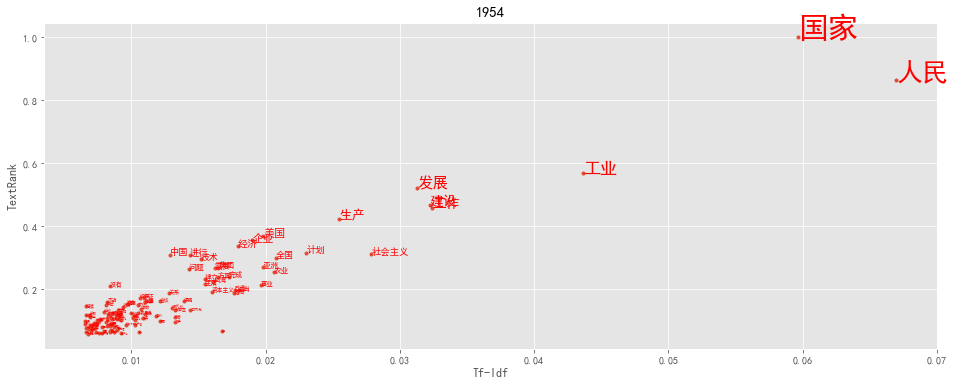

In [33]:
plt.style.use('ggplot')
plt.rcParams['font.sans-serif'] = ['SimHei']  # 用来正常显示中文标签
plt.rcParams['axes.unicode_minus'] = False  # 用来正常显示负号
keywords(1)

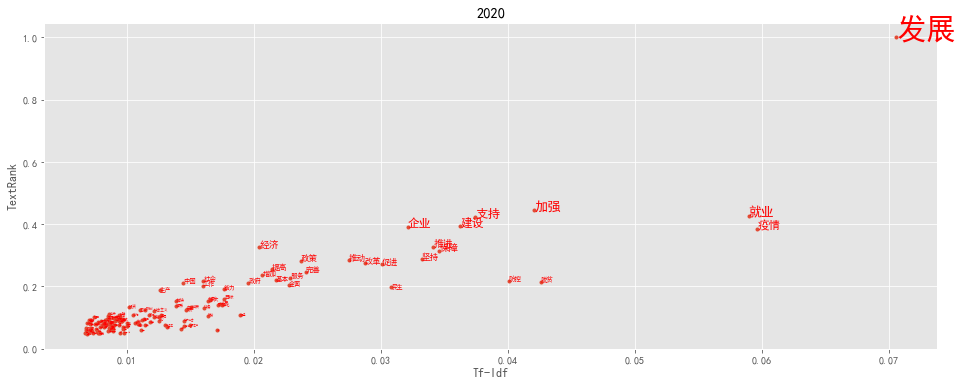

In [34]:
keywords(-1)

TextRank: Bringing Order into Texts

基本思想:

* 将待抽取关键词的文本进行分词
* 以固定窗口大小(默认为5，通过span属性调整)，词之间的共现关系，构建图
* 计算图中节点的PageRank，注意是无向带权图

### 4. 词云

In [36]:
def wordcloudplot(txt, year):
    wordcloud = WordCloud(font_path='./data/msyh.ttf').generate(txt)
    # Open a plot of the generated image.
    fig = plt.figure(figsize=(16, 6),facecolor='white')
    plt.imshow(wordcloud)
    plt.title(year)
    plt.axis("off")
    #plt.show()

#### 基于tfidf过滤的词云

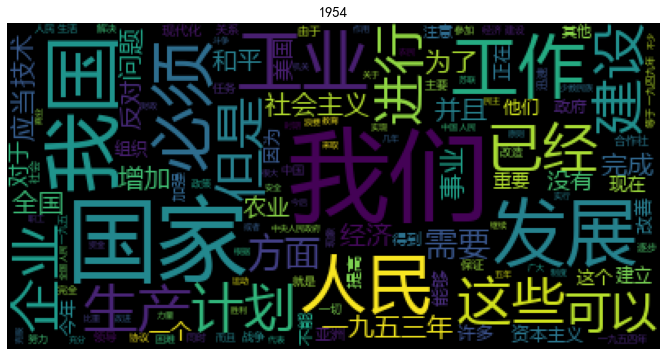

In [37]:
txt = reports[-1]
tfidf200= jieba.analyse.extract_tags(txt, topK=200, withWeight=False)
seg_list = jieba.cut(txt, cut_all=False)
seg_list = [i for i in seg_list if i in tfidf200]
txt200 = r' '.join(seg_list)
wordcloudplot(txt200, txt[:4]) 

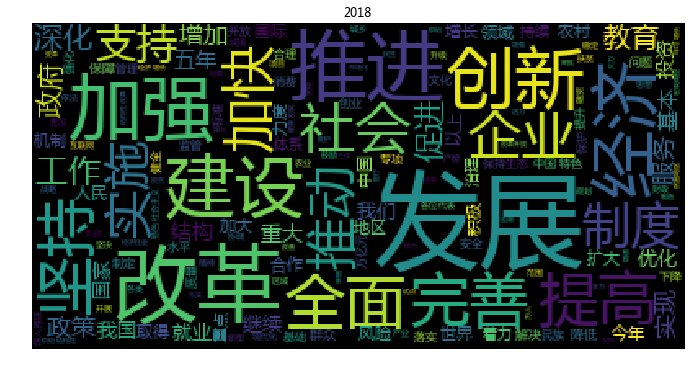

In [24]:
txt = reports[-2]
tfidf200= jieba.analyse.extract_tags(txt, topK=200, withWeight=False)
seg_list = jieba.cut(txt, cut_all=False)
seg_list = [i for i in seg_list if i in tfidf200]
txt200 = r' '.join(seg_list)
wordcloudplot(txt200, txt[:4]) 

In [59]:
wordfreq = defaultdict(int)
for i in seg_list:
    wordfreq[i] +=1
wordfreq = [[i, wordfreq[i]] for i in wordfreq]

wordfreq.sort(key= lambda x:x[1], reverse = True )
u"、 ".join([ i[0] + u'（' + str(i[1]) +u'）' for i in wordfreq ])

'发展（125）、 改革（68）、 推进（65）、 建设（54）、 经济（52）、 加强（45）、 推动（42）、 加快（40）、 政府（36）、 创新（36）、 完善（35）、 企业（35）、 全面（35）、 促进（34）、 提高（32）、 就业（31）、 实施（31）、 中国（31）、 支持（29）、 深化（29）、 政策（28）、 服务（27）、 国家（26）、 人民（26）、 工作（26）、 制度（25）、 我们（25）、 深入（25）、 社会（25）、 增长（25）、 群众（24）、 坚持（24）、 今年（23）、 继续（23）、 地区（22）、 扩大（22）、 农村（20）、 坚决（20）、 机制（19）、 治理（19）、 稳定（19）、 地方（19）、 保障（18）、 安全（18）、 保护（18）、 持续（17）、 合作（17）、 市场（17）、 重点（17）、 实现（17）、 消费（16）、 投资（16）、 综合（16）、 落实（16）、 试点（16）、 结构（15）、 有效（15）、 维护（15）、 加大（15）、 产能（15）、 积极（15）、 领域（15）、 教育（15）、 改善（14）、 国际（14）、 国内（14）、 城市（14）、 我国（14）、 生态（14）、 以上（14）、 基本（14）、 问题（14）、 强化（13）、 增加（13）、 农业（13）、 提升（13）、 制定（13）、 力度（13）、 质量（13）、 引导（13）、 降低（13）、 依法（12）、 战略（12）、 升级（12）、 重要（12）、 标准（12）、 作用（12）、 健康（12）、 保持（12）、 增强（12）、 生产（12）、 文化（12）、 更加（12）、 必须（12）、 创业（12）、 目标（12）、 民生（12）、 下降（12）、 确保（11）、 取得（11）、 供给（11）、 生活（11）、 核心（11）、 规范（11）、 环境（11）、 收费（11）、 进一步（11）、 管理（11）、 做好（10）、 完成（10）、 资金（10）、 能力（10）、 不断（10）、 开展（10）、 产业（10）、 健全（10）、 水平（10）、 科技（10）、 体系（10）、 风险（10）、 世界（10）、 鼓励（10）、 重大（10）、 一年（10）、 监管（10

#### 基于停用词过滤的词云

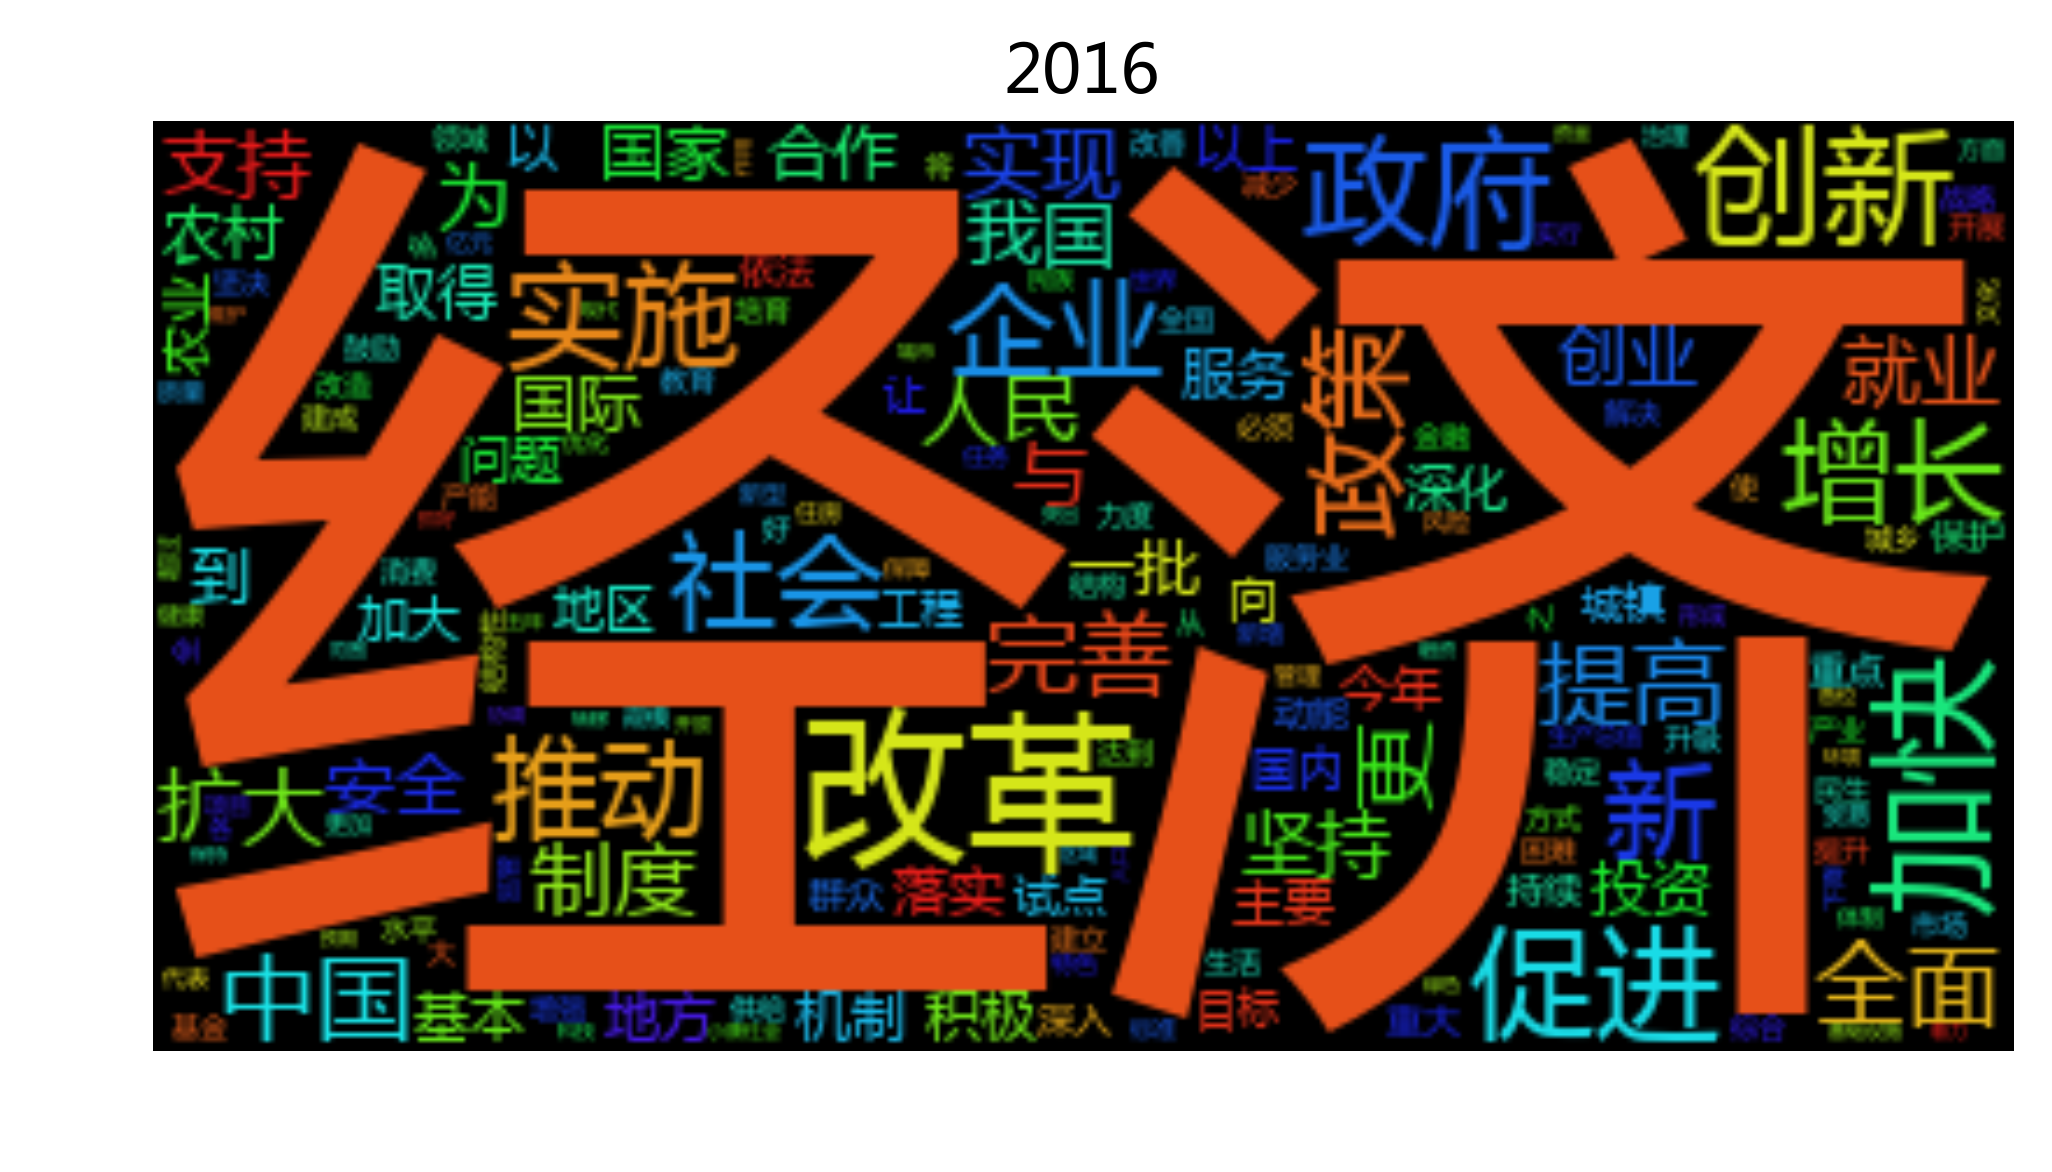

In [70]:
#jieba.add_word('股灾', freq=100, tag=None) 
txt = reports[-1]
seg_list = jieba.cut(txt, cut_all=False)
seg_list = [i for i in seg_list if i not in stopwords]
txt = r' '.join(seg_list)
wordcloudplot(txt, txt[:4])  
#file_path = '/Users/chengjun/GitHub/cjc2016/figures/wordcloud-' + txt[:4] + '.png'
#plt.savefig(file_path,dpi = 300, bbox_inches="tight",transparent = True)

### 绘制1954-2016政府工作报告词云

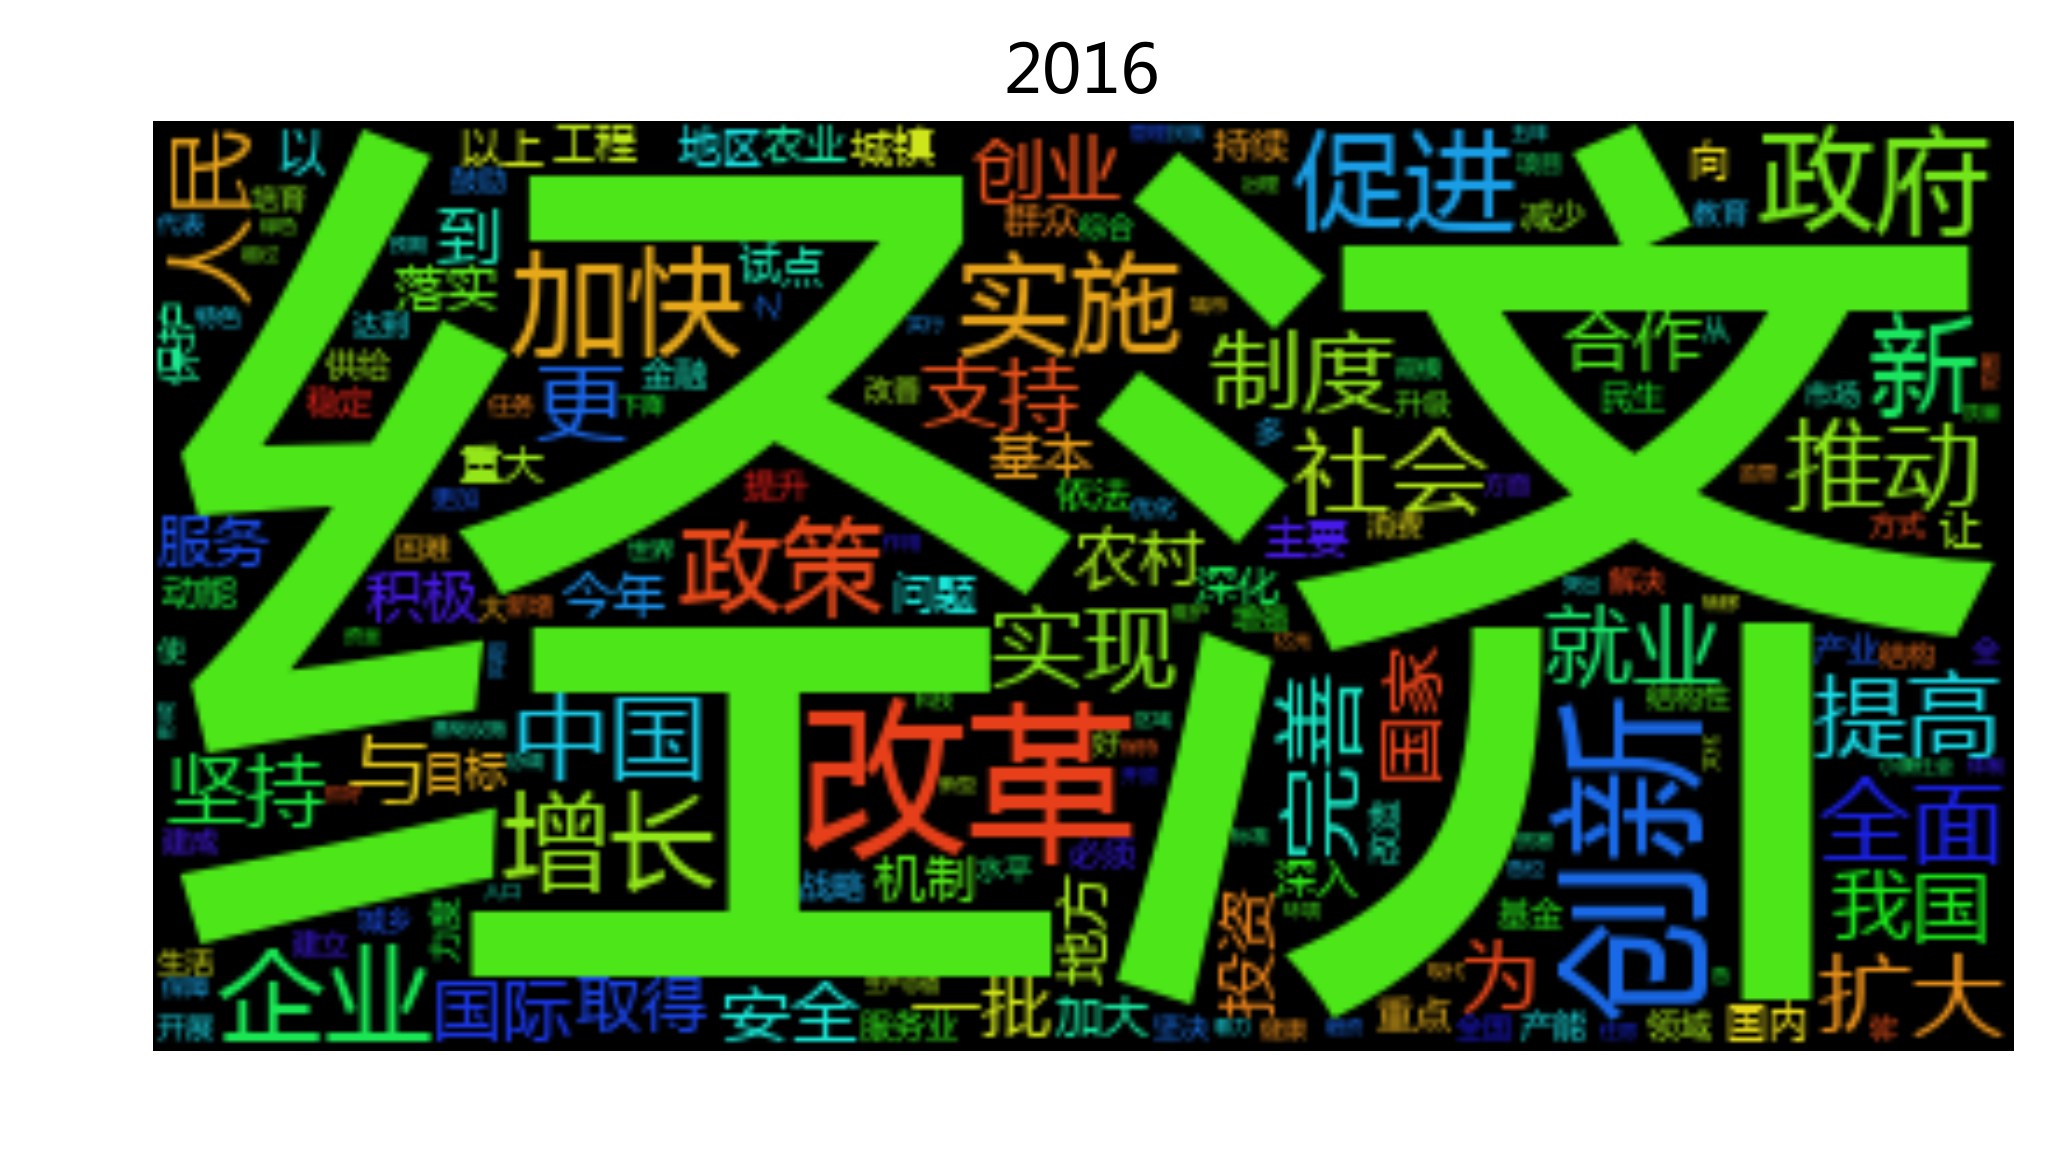

In [113]:
#jieba.add_word('股灾', freq=100, tag=None) 

for txt in reports:
    seg_list = jieba.cut(txt, cut_all=False)
    seg_list = [i for i in seg_list if i not in stopwords]
    txt = r' '.join(seg_list)
    wordcloudplot(txt, txt[:4]) 
    file_path = '../figure/wordcloud-' + txt[:4] + '.png'
    plt.savefig(file_path,dpi = 400, bbox_inches="tight",\
                transparent = True)


## 5. 词向量的时间序列

###  使用相对频数来进行计算

In [149]:
with open('./data/gov_reports1954-2021.txt', 'r', encoding = 'utf-8') as f:
    reports = f.readlines()

In [150]:
years = [int(i[:4]) for i in reports]

In [151]:
# import pandas as pd

# df = pd.read_table('./data/gov_reports1954-2021.txt', names = ['report'])

In [152]:
import jieba 

def cut_str(astr):
    seg_list = jieba.cut(astr, cut_all=False)
    return ' '.join(list(seg_list))

report_list = []
for k, i in enumerate(reports):
    report_list.append(cut_str(i))
    print(k)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51


In [165]:
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
count = CountVectorizer(ngram_range=(1, 1))
docs = np.array(report_list)
bag = count.fit_transform(docs)

In [195]:
bs.flatten()

array([ 6467,  4192,  7453,  7566,  7063,  7370,  6611,  6225,  5630,
        7060,  7188,  7363,  7040,  8777,  4904,  7286,  6439,  5828,
        7765,  5192,  5402,  5321,  5361,  5520,  5555,  6405,  5220,
        5218,  6295,  5230,  8663,  8751,  8315,  9736,  7314,  8992,
        4637,  6258,  7593,  9822, 10797,  3903,  9439,  9951,  1651,
        6162, 20121,  3225, 11378,  5032, 18484,  7776])

In [184]:
import pandas as pd
# Relative Frequency
bt = bag.toarray()
bs = np.sum(bt, axis = 1).reshape(-1,1)
# numpy divide row by row sum
rf = bt/bs
df = pd.DataFrame(rf, columns = count.get_feature_names())
df['year'] = years
df = df.sort_values(by=['year'], ascending=False)

In [194]:
df[:3]

01   02        03   04   05   07   08        10       100      1000  \
0  0.000155  0.0  0.000155  0.0  0.0  0.0  0.0  0.000619  0.000773  0.000155   
1  0.000000  0.0  0.000000  0.0  0.0  0.0  0.0  0.000000  0.000239  0.000239   
2  0.000000  0.0  0.000000  0.0  0.0  0.0  0.0  0.000537  0.000134  0.000268   

   ...   齐心      齐心协力  齐心合力  齐抓共管  齐步走   齐鲁   龙头  龙头企业  龙羊峡  year  
0  ...  0.0  0.000155   0.0   0.0  0.0  0.0  0.0   0.0  0.0  2021  
1  ...  0.0  0.000000   0.0   0.0  0.0  0.0  0.0   0.0  0.0  2020  
2  ...  0.0  0.000000   0.0   0.0  0.0  0.0  0.0   0.0  0.0  2019  

[3 rows x 20231 columns]

In [172]:
df['经济'][:5]

0    0.006649
1    0.005725
2    0.006172
3    0.007930
4    0.007362
Name: 经济, dtype: float64

In [173]:
import matplotlib.pyplot as plt

plt.style.use('ggplot')
plt.rcParams['font.sans-serif'] = ['SimHei']  # 用来正常显示中文标签
plt.rcParams['axes.unicode_minus'] = False  # 用来正常显示负号


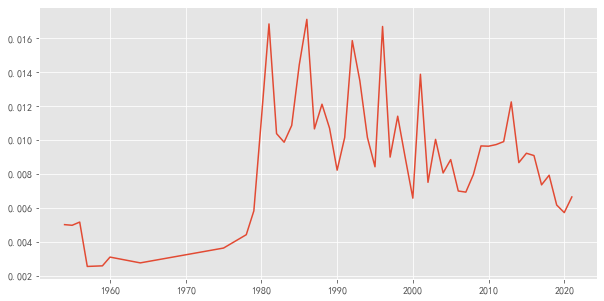

In [186]:
plt.figure(figsize = [10, 5])
plt.plot(df['year'], df['经济'])


In [176]:
def plotEvolution(word, color, linestyle, marker):
    plt.plot(df['year'], df[word], color = color, 
             linestyle=linestyle, marker=marker, label= word)
    plt.legend(loc=2,fontsize=18)
    plt.ylabel(u'相对频数')

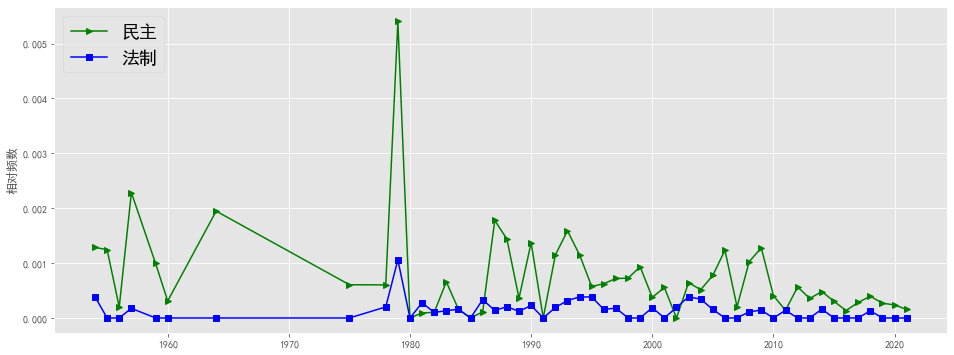

In [187]:
plt.figure(figsize=(16, 6),facecolor='white')
plotEvolution(u'民主', 'g', '-', '>')
plotEvolution(u'法制', 'b', '-', 's')

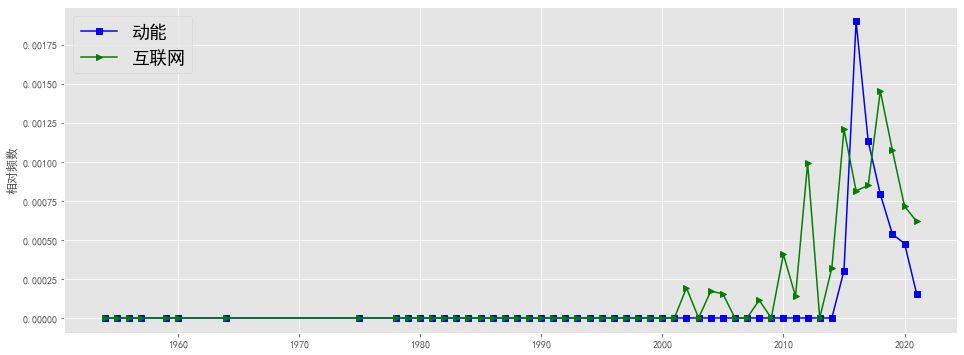

In [188]:
plt.figure(figsize=(16, 6),facecolor='white')

plotEvolution(u'动能', 'b', '-', 's')
plotEvolution(u'互联网', 'g', '-', '>')

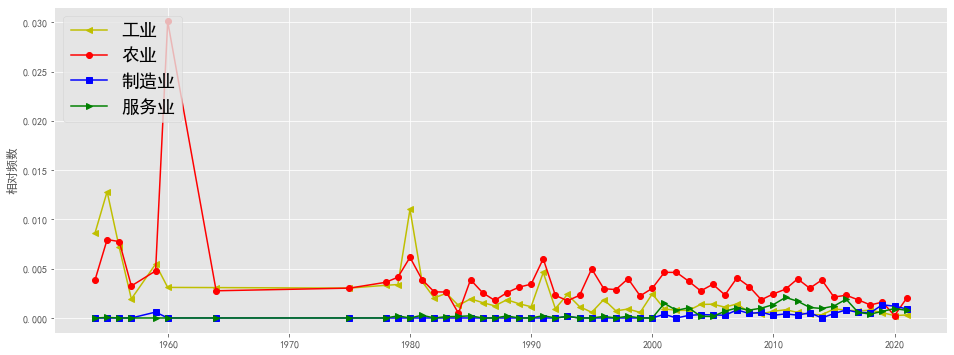

In [189]:
plt.figure(figsize=(16, 6),facecolor='white')

plotEvolution(u'工业', 'y', '-', '<')
plotEvolution(u'农业', 'r', '-', 'o')
plotEvolution(u'制造业', 'b', '-', 's')
plotEvolution(u'服务业', 'g', '-', '>')

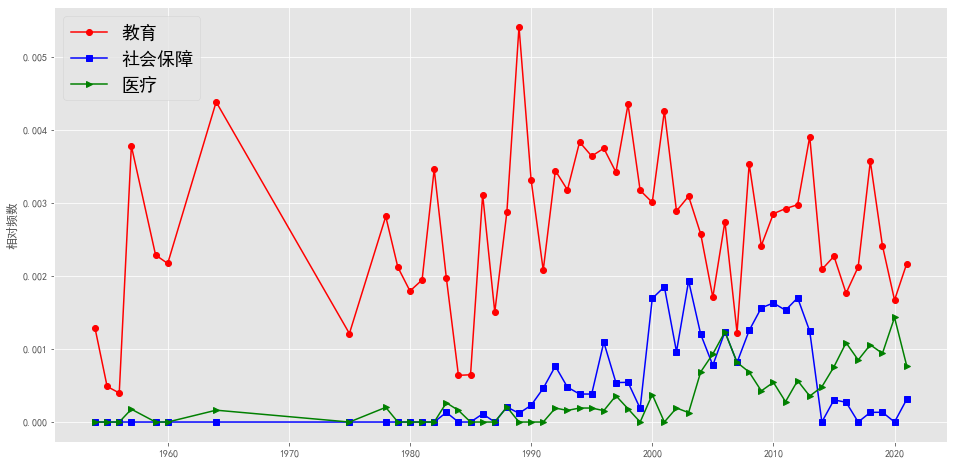

In [190]:
plt.figure(figsize=(16, 8),facecolor='white')

plotEvolution(u'教育', 'r', '-', 'o')
plotEvolution(u'社会保障', 'b', '-', 's')
plotEvolution(u'医疗', 'g', '-', '>')

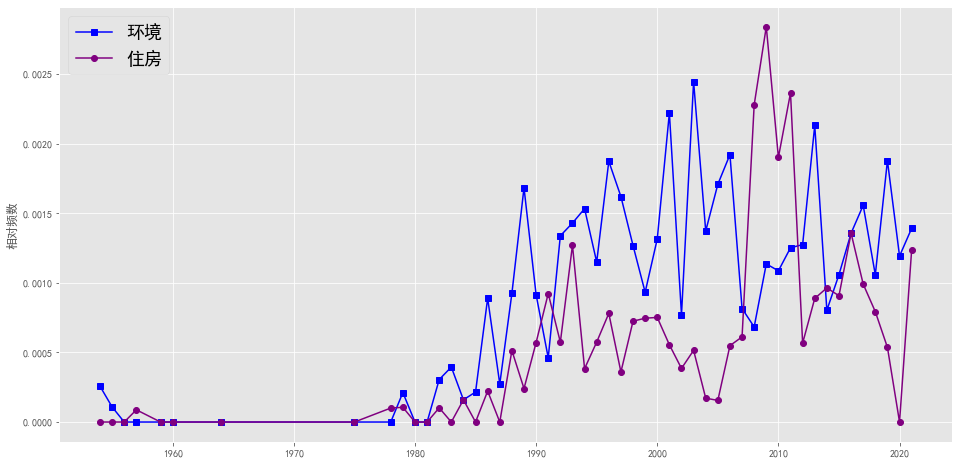

In [191]:
plt.figure(figsize=(16, 8),facecolor='white')

plotEvolution(u'环境', 'b', '-', 's')
plotEvolution(u'住房', 'purple', '-', 'o')

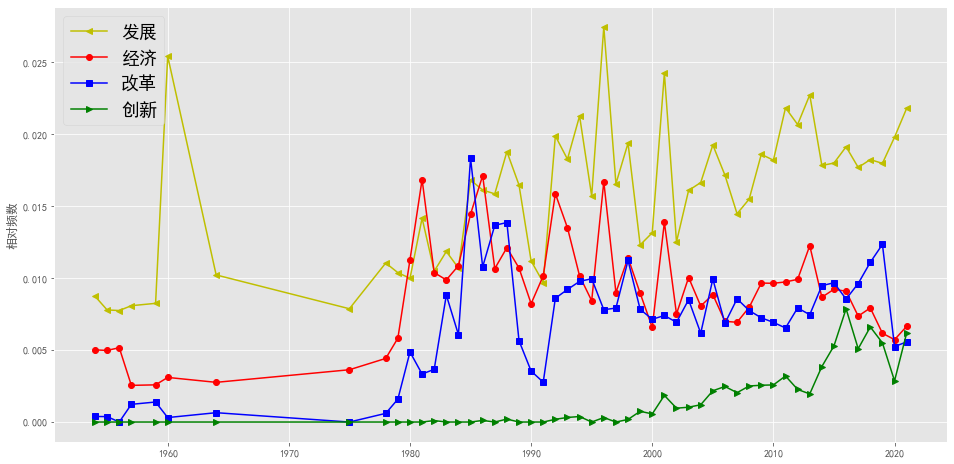

In [192]:
plt.figure(figsize=(16, 8),facecolor='white')

plotEvolution(u'发展', 'y', '-', '<')
plotEvolution(u'经济', 'r', '-', 'o')
plotEvolution(u'改革', 'b', '-', 's')
plotEvolution(u'创新', 'g', '-', '>')

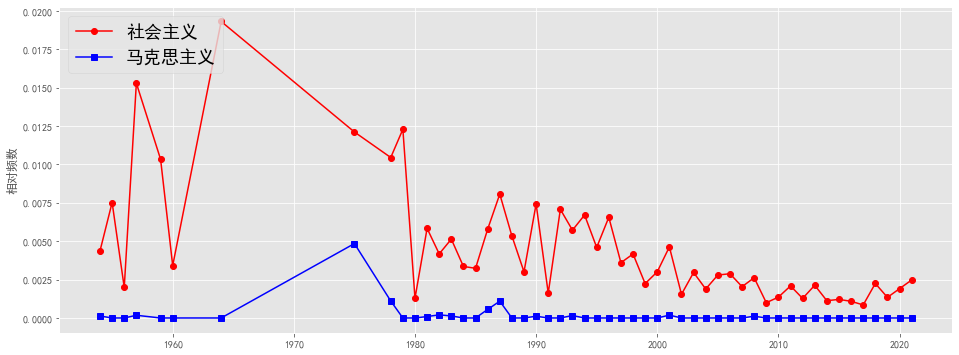

In [193]:
plt.figure(figsize=(16, 6),facecolor='white')

plotEvolution(u'社会主义', 'r', '-', 'o')
plotEvolution(u'马克思主义', 'b', '-', 's')

### 使用TF-IDF来计算

In [209]:
from sklearn.feature_extraction.text import TfidfTransformer
np.set_printoptions(precision=2)

count = CountVectorizer(ngram_range=(1, 1))
tfidf = TfidfTransformer(use_idf=True, norm='l2', smooth_idf=True)
docs = np.array(report_list)
bag_tfidf = tfidf.fit_transform(count.fit_transform(docs))


In [210]:
import pandas as pd
# Relative Frequency
bt = bag_tfidf.toarray()
bs = np.sum(bt, axis = 1).reshape(-1,1)
# numpy divide row by row sum
rf = bt/bs
df_tfidf = pd.DataFrame(rf, columns = count.get_feature_names())
df_tfidf ['year'] = years
df_tfidf = df_tfidf.sort_values(by=['year'], ascending=False)

In [211]:
def plotEvolution(word, color, linestyle, marker):
    plt.plot(df_tfidf['year'], df_tfidf[word], color = color, 
             linestyle=linestyle, marker=marker, label= word)
    plt.legend(loc=2,fontsize=18)
    plt.ylabel(u'TF-IDF')

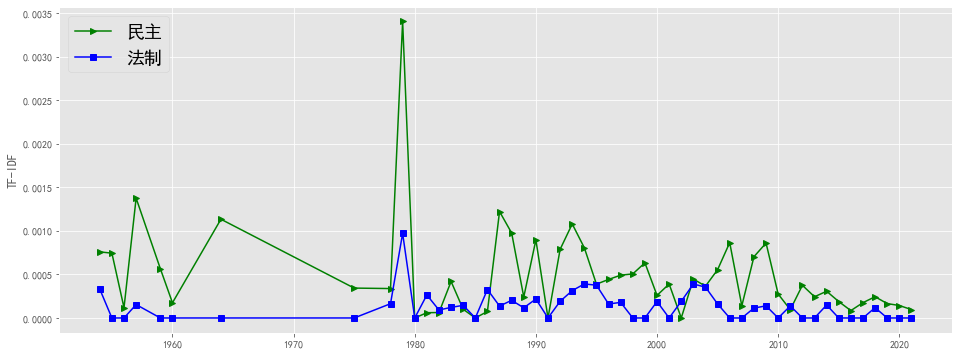

In [212]:
plt.figure(figsize=(16, 6),facecolor='white')
plotEvolution(u'民主', 'g', '-', '>')
plotEvolution(u'法制', 'b', '-', 's')

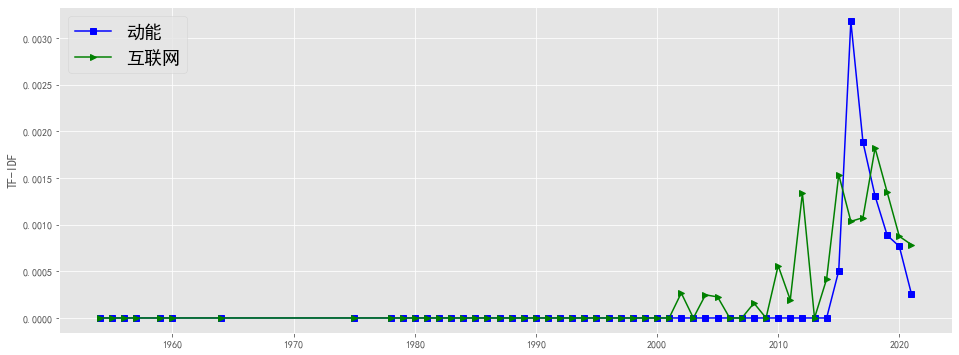

In [213]:
plt.figure(figsize=(16, 6),facecolor='white')

plotEvolution(u'动能', 'b', '-', 's')
plotEvolution(u'互联网', 'g', '-', '>')

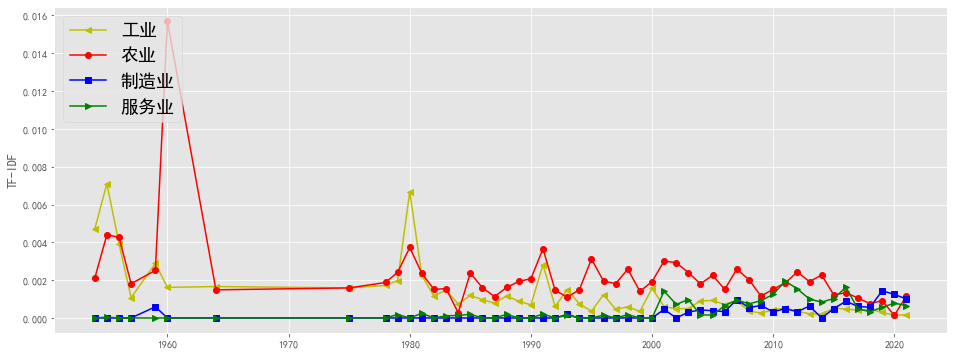

In [214]:
plt.figure(figsize=(16, 6),facecolor='white')

plotEvolution(u'工业', 'y', '-', '<')
plotEvolution(u'农业', 'r', '-', 'o')
plotEvolution(u'制造业', 'b', '-', 's')
plotEvolution(u'服务业', 'g', '-', '>')

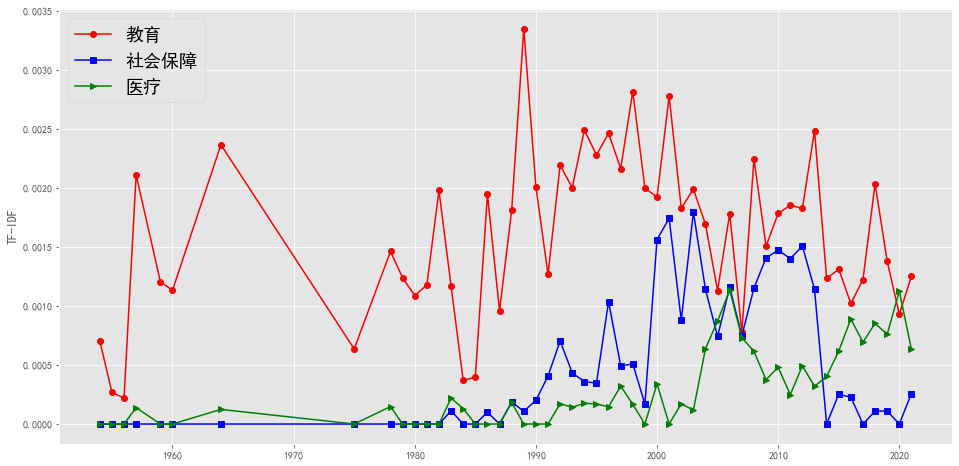

In [215]:
plt.figure(figsize=(16, 8),facecolor='white')

plotEvolution(u'教育', 'r', '-', 'o')
plotEvolution(u'社会保障', 'b', '-', 's')
plotEvolution(u'医疗', 'g', '-', '>')

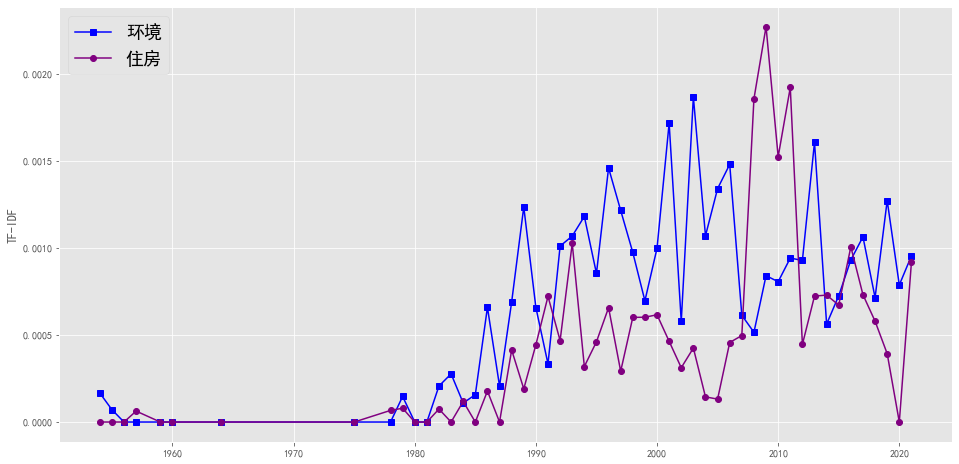

In [216]:
plt.figure(figsize=(16, 8),facecolor='white')

plotEvolution(u'环境', 'b', '-', 's')
plotEvolution(u'住房', 'purple', '-', 'o')

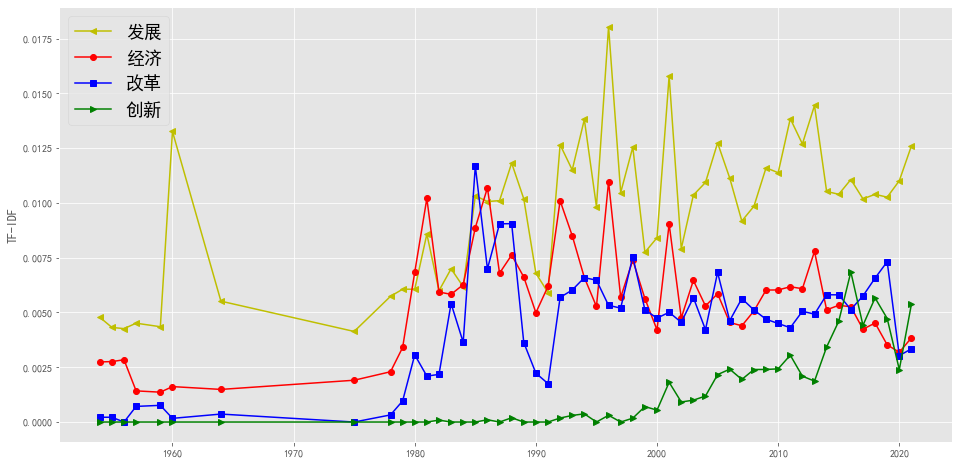

In [217]:
plt.figure(figsize=(16, 8),facecolor='white')

plotEvolution(u'发展', 'y', '-', '<')
plotEvolution(u'经济', 'r', '-', 'o')
plotEvolution(u'改革', 'b', '-', 's')
plotEvolution(u'创新', 'g', '-', '>')

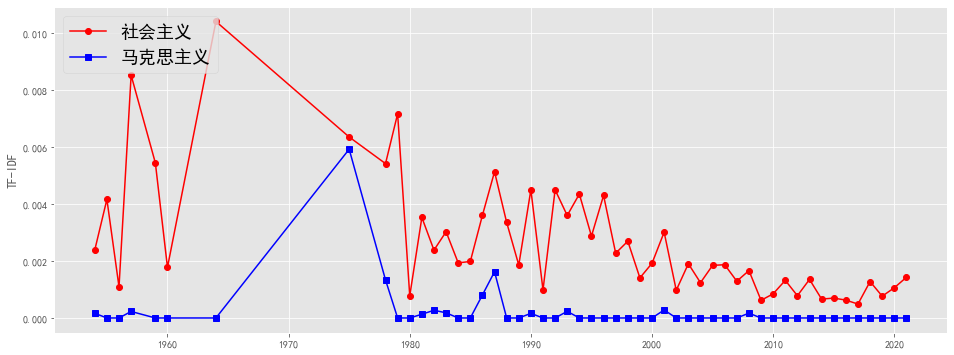

In [218]:
plt.figure(figsize=(16, 6),facecolor='white')

plotEvolution(u'社会主义', 'r', '-', 'o')
plotEvolution(u'马克思主义', 'b', '-', 's')

![image.png](images/end.png)